# Single-cell data pre-processing

This notebook explains how to pre-process single-cell data using $\texttt{scvelo}$ package and annotated data structure

## Cell Cycles

In order to run cell cycle experiments, you need to download the data from  https://zenodo.org/records/4719436. 

In the $\texttt{cell cycle}$ notebook we consider the 2-dimensional case for purpose of visualizing simple trjaectories, however in $\texttt{src}$ one can find higher dimension experiments.

In order to pre-process the dataset, one needs to construct cell-cell k-nn graph and compute RNA velocities fitting the stochastic transcriptional dynamics model [1] as mentioned in [2]

**References**

[1] La Manno, Gioele, et al. "RNA velocity of single cells." Nature 560.7719 (2018): 494-498.

[2] Riba, Andrea, et al. "Cell cycle gene regulation dynamics revealed by RNA velocity and deep-learning." Nature communications 13.1 (2022): 2865.

In [ ]:
import scanpy as sc
import scvelo as scv

adata_path = ""
adata = sc.read_h5ad(adata_path)
adata


In [ ]:
# Preprocess data
scv.pp.neighbors(adata)
scv.pp.moments(adata)

# Get cell velocities
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata)

adata.write_h5ad(adata_path)

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color = ['cell_cycle_theta', 'phase'])

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', save='streamplot.pdf')

In [ ]:
sc.pl.scatter(adata, basis="umap", color=["phase"])

## Mouse Erythroid

The raw mouse erythroid data can be accessed using $\texttt{scvelo}$. 

RNA velocities are precomputed using $\texttt{unitvelo}$ package and the dataset with pre-processed RNA velocities can be accessed here

In this notebook we provide visualization of cells and their characteristics, but to run our ecperiments use pre-processed data with $\texttt{unitvelo}$

In [2]:
adata = scv.datasets.gastrulation_erythroid()

  0%|          | 0.00/463M [00:00<?, ?B/s]

In [3]:
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [5]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_3526834/233639239.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
2025-11-30 15:22:45.284837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, s

    finished (0:00:28) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:09) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr'
    uns: 'celltype_colors', 'log1p', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/slurm-storage/katpet/.local/lib/python3.11/site-packages/scvelo/plotting/ut

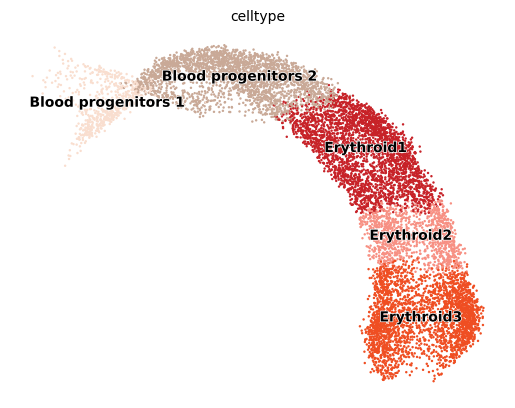

In [10]:
scv.pl.scatter(adata, color = ["celltype"])